# Tarea 4

**Envío del PR inicial:** lunes 26 de septiembre

**Aceptación del PR:** 

**Ejercicio 0:** Velocidad de convergencia

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos último incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

  Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto sea neutral (ni atractivo ni repulsivo)?

  En los dos últimos incisos, el interés es en los ciclos de periodo 2.

In [34]:
using PyPlot;

In [91]:
F_3(x)=exp(x-1)
F_3´(x)=exp(x-1)
F_5(x)=exp(x+1)
F´_5(X)=exp(x+1)

F´_5 (generic function with 1 method)

In [66]:
function iter_map(f::Function,x_0::Float64,m::Int)
    x=x_0
    xvec=Float64[]
    fvec=Float64[]
    push!(xvec,x)
    for i in 1:m
        x=f(x)
        push!(xvec,x)
    end 
    return xvec
end 
        

iter_map (generic function with 1 method)

In [84]:
fprueb(x)=x^2-1

fprueb (generic function with 1 method)

In [92]:
it=iter_map(F_3,-0.9,20)

21-element Array{Float64,1}:
 -0.9     
  0.149569
  0.427231
  0.563961
  0.646593
  0.702291
  0.742517
  0.772995
  0.796917
  0.81621 
  0.832111
  0.845448
  0.856799
  0.866579
  0.875097
  0.882583
  0.889214
  0.89513 
  0.900442
  0.905237
  0.909589

In [42]:
function newton(f,f´,x_0,m)
    x=x_0
    for i in 1:m
        x=x-(f(x))/f´(x)
      
    end 
    return x
end 

newton (generic function with 1 method)

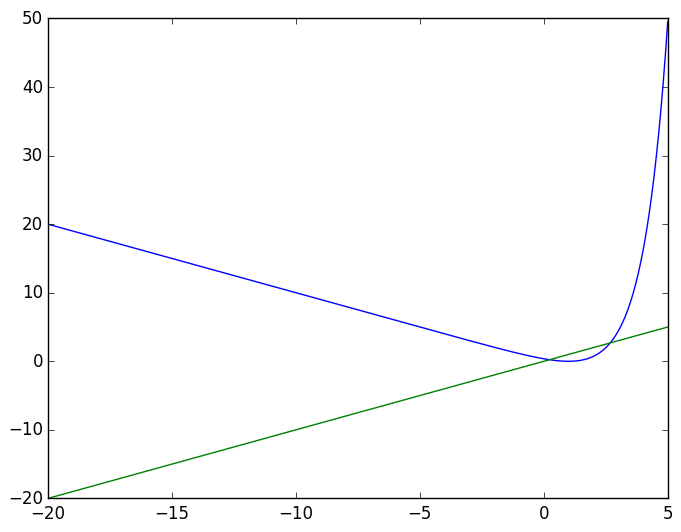

In [108]:
x=-20:1/2^16:5
ff=F_3(x)-x
plot(x,ff)
plot(x,x);
#axis([-10,10,-0.5,2]);

In [60]:
F_5(-200)

200.0

In [109]:
exp(-19)

5.602796437537268e-9

**Ejercicio 1:**

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)$, donde la órbita de periodo $2^n$ nace. Es decir, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.



*Hint:* Para realizar este ejercicio deben calcular el atractor para varias valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Sin embargo, van a requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 

Una opción, que tiene ciertos inconvenientes numéricos que también ciertas ventajas se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ usando los polinomios $Q_c^p(x)$ y diferenciación automática.

In [15]:
c=1
:g(x)=(x^2+c)

LoadError: LoadError: syntax: invalid method name ":g"
while loading In[15], in expression starting on line 2

In [8]:
f(x)=eval(expr)

f (generic function with 1 method)

In [9]:
f(2)

LoadError: LoadError: UndefVarError: x not defined
while loading In[9], in expression starting on line 1

In [16]:
nombre(n::Int) = symbol( string("W_", n) )

nombre (generic function with 1 method)

In [17]:
nombre(3)

:W_3

In [18]:
function wilkinson(n::Int)
    # Checo que `n` sea >= 1
    @assert n ≥ 1   # ≥ se obtiene con \ge<TAB>
    
    ex = :(x-1)
    for i = 2:n
        ex = :( ($ex) * ( x-$i) )
    end
    ex_ret = :( $(nombre(n))(x) = $ex )
    ex_ret
end

wilkinson (generic function with 1 method)

In [24]:
wilkinson(5)

:(W_5(x) = begin  # In[18], line 9:
            ((((x - 1) * (x - 2)) * (x - 3)) * (x - 4)) * (x - 5)
        end)

In [23]:
W_5(1.2)

3.0643199999999995

In [25]:
2^6

64

**Ejercicio 2:**

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. ¿Cómo se comparan los valores obtenidos de $f_n$?

**Ejercicio 3:**

Como se ve en la Fig. 1, $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que $x=0$ esté en el ciclo de periodo $2^n$ marca los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

¿A qué converge la secuencia $f_n$, definida ahora con los valores $C_n$.

De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es menor; a ese punto lo identificamos como $d_n$. Calcular numéricamente a dónde converge la secuencia $d_n/d_{n+1}$.